# Iris Dataset: EDA, Clustering, Classification & Regression

## 📌 Objective

The purpose of this project is to perform a complete data science workflow on the famous **Iris flower dataset**. We will go through:

- 📊 **Exploratory Data Analysis (EDA)** to understand the dataset
- 🧠 **Clustering** to group data points without using the target labels
- ✅ **Classification** to build models that can predict the species of a flower
- 📈 **Regression** to predict numeric features based on others

## 🌼 About the Dataset

The **Iris dataset** contains 150 samples of iris flowers, with the following features:
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)

Each sample is labeled as one of three species:
- Iris-setosa
- Iris-versicolor
- Iris-virginica

This dataset is small and clean, making it ideal for demonstrating machine learning concepts.












In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Load Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

## Exploratory Data Analysis (EDA)

In [6]:
print("Head of the dataset:")
print(df.head())

print("\nData Info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

Head of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)  

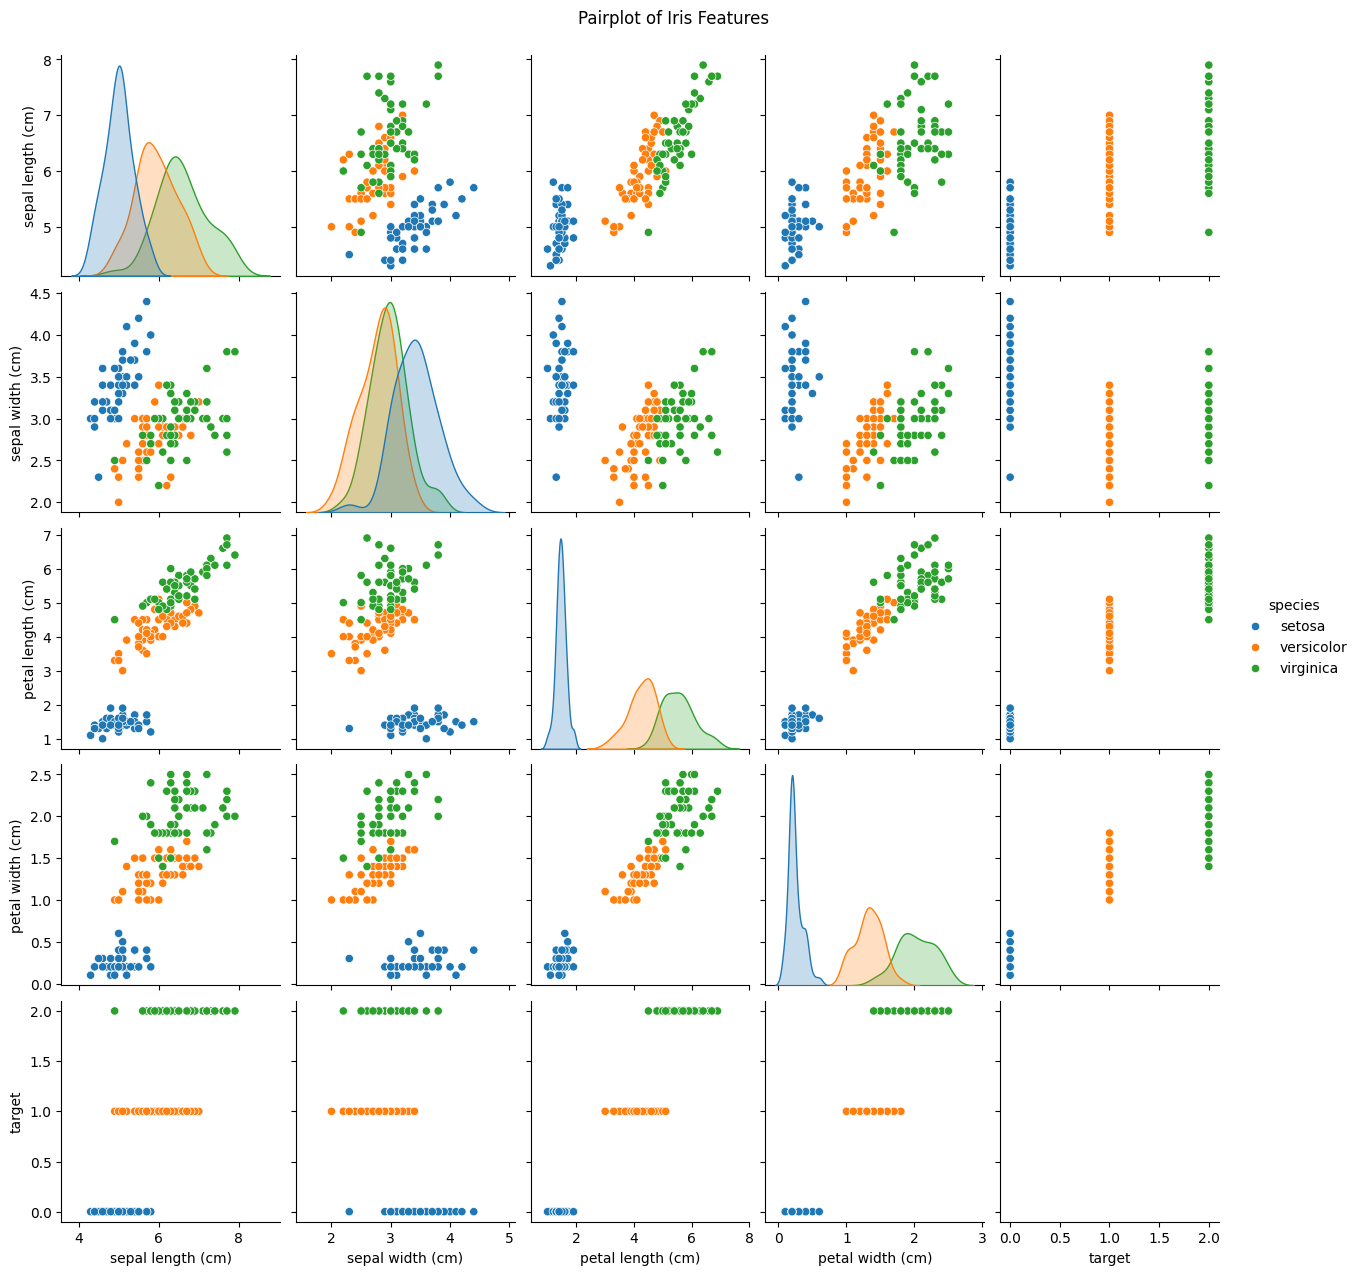

In [9]:
# Features Pairplot
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

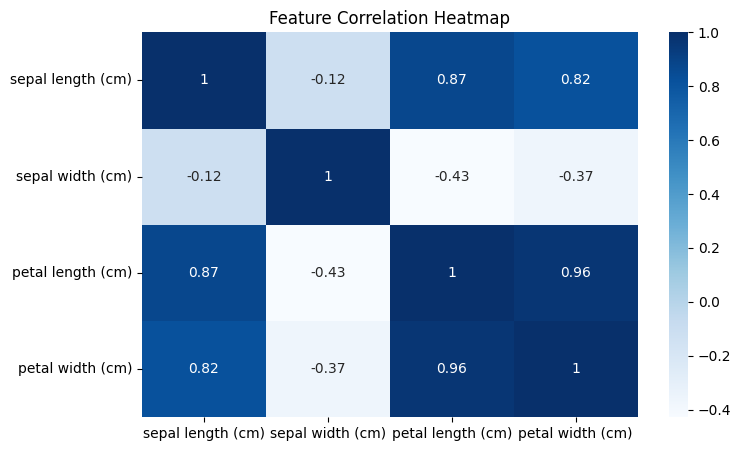

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.iloc[:, :-2].corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

## Clustering

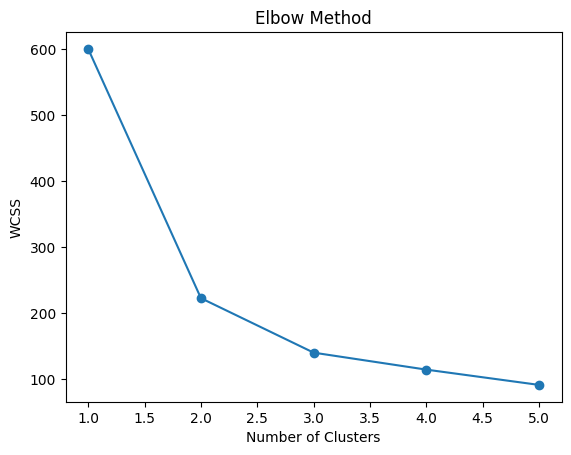

In [11]:
# KMeans
features = df.iloc[:, :-2]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Elbow method
wcss = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

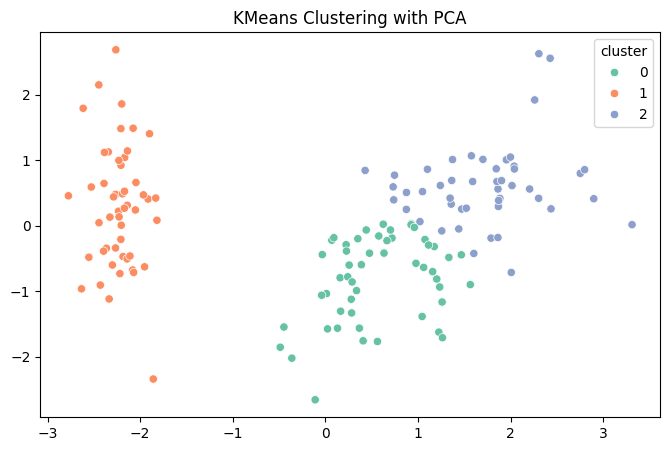

In [12]:
# Final KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2')
plt.title("KMeans Clustering with PCA")
plt.show()

## Classification

In [14]:
X = df.iloc[:, :-3]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [18]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Regression

In [19]:
X_reg = df.drop(columns=['petal width (cm)', 'target', 'species', 'cluster'])
y_reg = df['petal width (cm)']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(Xr_train, yr_train)
yr_pred = lin_reg.predict(Xr_test)

print("Linear Regression (Petal Width)")
print("R² Score:", r2_score(yr_test, yr_pred))
print("MSE:", mean_squared_error(yr_test, yr_pred))

Linear Regression (Petal Width)
R² Score: 0.9407619505985545
MSE: 0.037712258650058


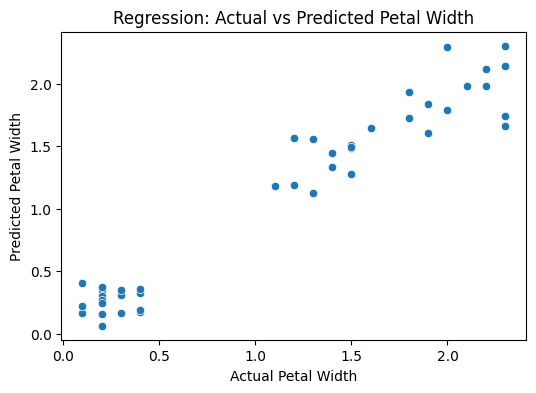

In [20]:
# Predicted vs Actual Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=yr_test, y=yr_pred)
plt.xlabel("Actual Petal Width")
plt.ylabel("Predicted Petal Width")
plt.title("Regression: Actual vs Predicted Petal Width")
plt.show()